In [1]:
# prediction of a digit using cnn

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
#pip install opencv_python

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

In [6]:
len(train_images), len(train_labels)

(60000, 60000)

In [7]:
len(test_images), len(test_labels)

(10000, 10000)

In [8]:
train_images[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [9]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
train_images[0].shape

(28, 28)

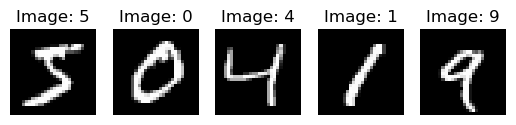

In [11]:
# Display some sample train images
num_samples_to_display=5

for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Image: {train_labels[i]}")
    plt.axis('off')

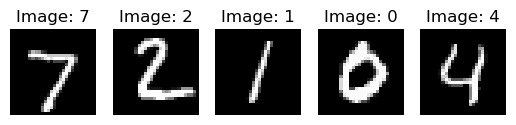

In [12]:
# Display some sample train images
num_samples_to_display=5

for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Image: {test_labels[i]}")
    plt.axis('off')

In [13]:
def showImages(images, labels):
    i=1
    for img,lab in zip(images,labels):
        plt.subplot(1, len(labels), i)
        plt.imshow(img, cmap='gray')
        plt.title(f'image={lab}')
        plt.axis('off')
        i=i+1
plt.show()

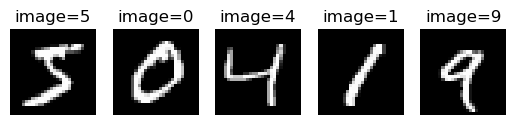

In [14]:
showImages(train_images[0:5], train_labels[0:5])

In [15]:
# Scaling images i.e., converting colour images to gray scale images

train_images=train_images/255
test_images=test_images/255

In [16]:
# Convert the 2-d matrix to a 1-d array
train_images=train_images.reshape(-1,28,28,1) # training set
test_images=test_images.reshape(-1,28,28,1) # test set

In [17]:
train_images[0:3]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [18]:
# Build the CNN model

model=models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=25, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=25, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
                  
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
# Compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10


750/750 [==============================] - 25s 24ms/step - loss: 0.4365 - accuracy: 0.8666 - val_loss: 0.1731 - val_accuracy: 0.9463
Epoch 2/10
750/750 [==============================] - 17s 23ms/step - loss: 0.1394 - accuracy: 0.9568 - val_loss: 0.1236 - val_accuracy: 0.9632
Epoch 3/10
750/750 [==============================] - 17s 23ms/step - loss: 0.1066 - accuracy: 0.9674 - val_loss: 0.1009 - val_accuracy: 0.9712
Epoch 4/10
750/750 [==============================] - 18s 24ms/step - loss: 0.0881 - accuracy: 0.9729 - val_loss: 0.0811 - val_accuracy: 0.9760
Epoch 5/10
750/750 [==============================] - 17s 23ms/step - loss: 0.0752 - accuracy: 0.9763 - val_loss: 0.0738 - val_accuracy: 0.9776
Epoch 6/10
750/750 [==============================] - 18s 24ms/step - loss: 0.0689 - accuracy: 0.9784 - val_loss: 0.0803 - val_accuracy: 0.9759
Epoch 7/10
750/750 [==============================] - 17s 23ms/step - loss: 0.0611 - accuracy: 0.9810 - val_loss: 0.0679 - val_accurac

In [21]:
# Evaluate the model on train set
test_loss, test_acc=model.evaluate(train_images, train_labels)
print(f'Test accuracy: {test_acc}')

1875/1875 [==============================] - 21s 9ms/step - loss: 0.0405 - accuracy: 0.9873
Test accuracy: 0.9873499870300293


In [22]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.0649 - accuracy: 0.9814


[0.06485909223556519, 0.9814000129699707]

In [23]:
# Save the trained model
model.save('digit_recognition_model.h5')

D:\anaconda\Project1\env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
y_predict = model.predict(test_images)

NameError: name 'model' is not defined

In [25]:
#showImages(test_images[:5])

In [26]:
np.argmax(y_predict[1])

2

In [12]:
#function to process the image , it takes image path and returns numeric matrix
def preprocess_image(image_path):
 #load the image and convert it into grayscale
 img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
 
 #resize the image into match the input size of the model
 img = cv2.resize(img, (28, 28))
 
 #normalize the pixel values to be in between 0 and 1
 img = img/ 255.0
 
 #Reshape the image to match the input shape of the model
 img = np.reshape(img, (1, 28, 28, 1))
 return img

In [11]:
#function to make predictions on the input image
def predict_image(model, image_path):
 #preprocess the input image
 processed_image = preprocess_image(image_path)
 
 #make predictions using the model
 predictions = model.predict(processed_image)
 
 #get the index of the class with the highest probabaility
 predicted_class = np.argmax(predictions)
 
 return predicted_class

In [7]:
#function to dispaly the image
def show_image(image_path):
 img = cv2.imread(image_path)
 plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
 plt.axis('off')
 plt.show

In [1]:
from tensorflow.keras.models import load_model
model = load_model('digit_recognition_model.h5')

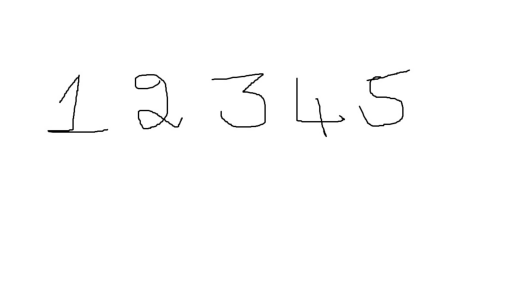

In [8]:
image_path = './datasets/input_num.jpg'
show_image(image_path)

In [9]:
image = cv2.imread(image_path)
img1 = np.array(image)
img1

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [13]:
#make a prediction on the custom image
predict_label = predict_image(model, image_path)

1/1 [==============================] - 4s 4s/step


In [14]:
predict_label

0

In [15]:
# Function to display the image with bounding boxes around digits
def show_image_with_boxes(image_path, boxes):
 img = cv2.imread(image_path)
 
 for box in boxes:
     x, y, w, h = box
     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
 plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
 plt.axis('off')
 plt.show()

In [16]:
# Load the image
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [17]:
# Apply thresholding or other pre-processing techniques to highlight digits
# (You may need to experiment with this based on your specific images)
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

In [18]:
# Find contours in the image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [19]:
# List to store bounding boxes of digits
digit_boxes=[]

for contour in contours:
    x,y,w,h=cv2.boundingRect(contour)
    
    # Filter out small contours, adjust this threshold based on your images
    if w > 5 and h > 5:
        digit_boxes.append((x,y,w,h))

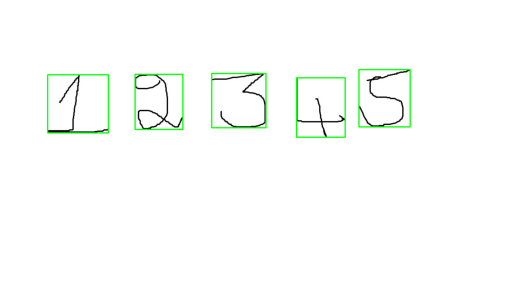

In [20]:
# Show the image with bounding boxes around detected digits
show_image_with_boxes(image_path, digit_boxes)

In [21]:
# Make predictions for each digit
i=0
for box in digit_boxes:
    i=i+1
    x, y, w, h = box
    roi = img[y:y+h, x:x+w]
    roi_path = f'digit_roi_{i}.jpg'  # You may want to save each digit as a separate image
    cv2.imwrite(roi_path, roi)
    predict_label = predict_image(model, roi_path)
    print(f'The handwritten number in the ROI is predicted to be: {predict_label}')

1/1 [==============================] - 0s 107ms/step
The handwritten number in the ROI is predicted to be: 8
1/1 [==============================] - 0s 34ms/step
The handwritten number in the ROI is predicted to be: 0
1/1 [==============================] - 0s 49ms/step
The handwritten number in the ROI is predicted to be: 4
1/1 [==============================] - 0s 54ms/step
The handwritten number in the ROI is predicted to be: 8
1/1 [==============================] - 0s 74ms/step
The handwritten number in the ROI is predicted to be: 8
